In [59]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


#A base de dados está em: https://www.kaggle.com/spscientist/students-performance-in-exams
caminho_dataset = "StudentsPerformance.csv"
dados = pd.read_csv(caminho_dataset) 

#transformando "math_score" em classes de avaliação
def math_score_to_class(x):
    if x <= 33:
        return 0
    elif 34 <= x <= 66:
        return 1
    else:
        return 2

dados["math score"] = dados["math score"].apply(math_score_to_class)


X = dados.to_numpy()
y = X[:,5:6]
X = X[:,:5]

y = y.astype('int')
y = y.ravel()

label_encoder = LabelEncoder()

#transformando "Gender" em número inteiro
X[:,0:1] = label_encoder.fit_transform(X[:,0:1]).reshape(X.shape[0], 1)

#transformando "race/ethnicity" em número inteiro
X[:,1:2] = label_encoder.fit_transform(X[:,1:2]).reshape(X.shape[0], 1)

#transformando "parental level of education" em número inteiro
X[:,2:3] = label_encoder.fit_transform(X[:,2:3]).reshape(X.shape[0], 1)

#transformando "lunch" em número inteiro
X[:,3:4] = label_encoder.fit_transform(X[:,3:4]).reshape(X.shape[0], 1)

#transformando "test preparation course" em número inteiro
X[:,4:5] = label_encoder.fit_transform(X[:,4:5]).reshape(X.shape[0], 1)



In [60]:
modelo = LogisticRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print("MSE:", mean_squared_error(y, ypred))

MSE: 0.364


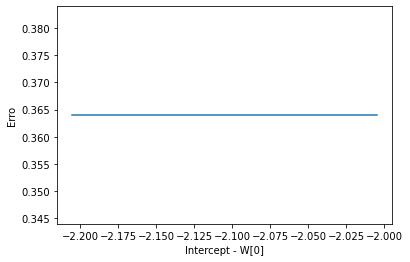

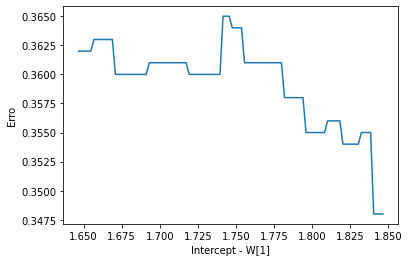

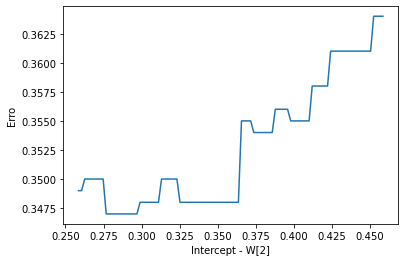

In [61]:
#print("Tamanho do Intercept: ", len(modelo.intercept_ ))
delta_w0 = [0.1, 1, 10]

def plot(i,delta):
    erros = []
    intercept = modelo.intercept_ [i]
    ws = np.linspace(intercept-delta, intercept+delta, 100)
    for w in ws:
        modelo.intercept_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    
    plt.ylabel("Erro")
    plt.xlabel(f"Intercept - W[{i}]")
    plt.plot(ws,erros)
    plt.show()

for i in range(len(modelo.intercept_ )):
    plot(i, delta_w0[0])    

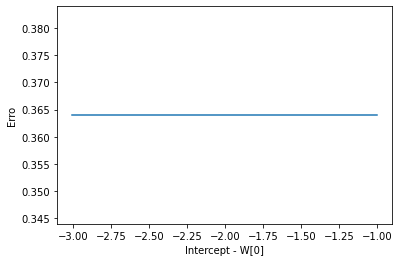

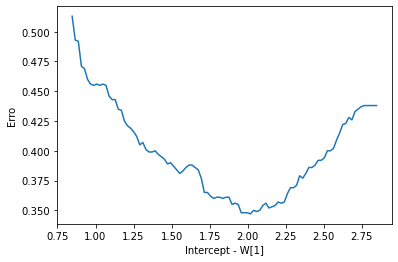

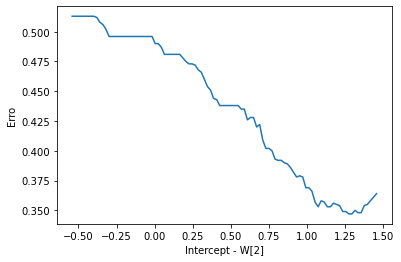

In [62]:
for i in range(len(modelo.intercept_ )):
    plot(i, delta_w0[1])

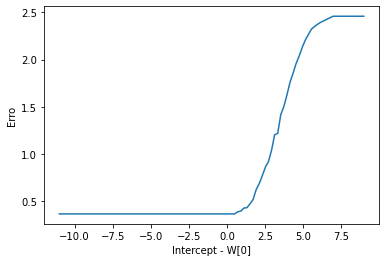

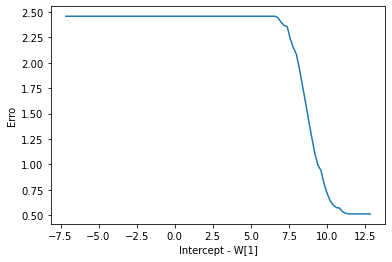

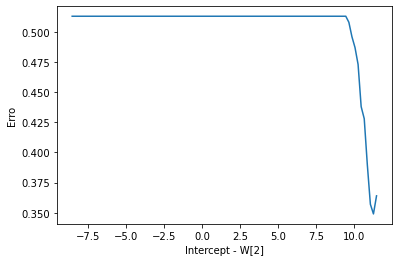

In [63]:
for i in range(len(modelo.intercept_ )):
    plot(i, delta_w0[2])

In [64]:
'''
for delta in delta_w0: 
    print('Delta = ', delta)
    for i in range(len(modelo.intercept_ )):        
        plot(i, delta)
    print('==========================================')
'''    

"\nfor delta in delta_w0: \n    print('Delta = ', delta)\n    for i in range(len(modelo.intercept_ )):        \n        plot(i, delta)\n    print('==========================================')\n"